In [13]:
import numpy as np
from matplotlib import pyplot as plt
import torch

In [4]:
from model import BraggNN

In [6]:
# load a pre-trained model 
model  = BraggNN(imgsz=11, fcsz=(16, 8, 4, 2)) # should use the same argu as it in the training.
mdl_fn = 'models/fc16_8_4_2-sz11.pth'
model.load_state_dict(torch.load(mdl_fn, map_location=torch.device('cpu')))

<All keys matched successfully>

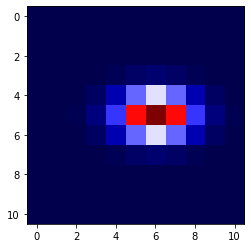

In [28]:
# use a simple gaussian for demo
# node that models in this repo are pre-trained with real experiment data
# the simple gaussian data may not simplify anything but makes a challenge to the model
# as the train data and testing data are not IID.
X_test = np.zeros((11, 11))
x_cen, y_cen = 6.0, 5.0

sig_x, sig_y = 0.6, 1.5
for x in range(11):
    for y in range(11):
        X_test[y][x] = 1000*(np.exp(-(x-x_cen)*(x-x_cen)/2*sig_x -(y-y_cen)*(y-y_cen)/2*sig_y))
        
# the input needs to be normalize to 0-1, e.g., rescale using min-max norm
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

plt.imshow(X_test, cmap='seismic')
plt.show(); plt.close()

In [29]:
input_tensor = torch.from_numpy(X_test[np.newaxis, np.newaxis].astype('float32'))
with torch.no_grad():
    pred = model.forward(input_tensor).cpu().numpy()

In [30]:
# scale back peak location by multiply with patch size
pred * 11

array([[5.9797044, 4.919209 ]], dtype=float32)